In [1]:
# libraries
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
perfomances_dt2 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt2.rds")[None] # also works for RData
percent20_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/percent20_dt.rds")[None] # also works for RData
percent20_dt = percent20_dt[['NMS','policy']]
percent20_dt = percent20_dt[percent20_dt.NMS == 'static']

In [3]:
perfomances_dt2

,policy,region,id_10,NMS,z,id_field,Y_corn,Y_soy,L1,L2,L,N_fert,P,G,area_ha
0,ratio_5,3,5,dynamic,15,1.0,13625.801159,4179.852134,8.286348,13.159986,21.446334,130.0,1816.612162,0.0,40.0
1,ratio_6,3,5,dynamic,15,1.0,13625.801159,4179.852134,8.286348,13.159986,21.446334,130.0,1798.412162,18.2,40.0
2,ratio_7,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,11.404880,18.770876,120.0,1762.256868,33.6,40.0
3,ratio_8,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,11.404880,18.770876,120.0,1745.456868,50.4,40.0
4,ratio_9,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,11.404880,18.770876,120.0,1728.656868,67.2,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449595,lag_10,1,1526,static,29,1.0,12571.601761,4072.108344,20.196424,29.860308,50.056732,180.0,1634.024247,0.0,40.0
6449596,lag_15,1,1526,static,29,1.0,12571.601761,4072.108344,20.196424,29.860308,50.056732,180.0,1634.024247,0.0,40.0
6449597,lag_20,1,1526,static,29,1.0,12336.913755,4073.163776,19.378366,28.512097,47.890463,170.0,1608.167926,0.0,40.0
6449598,lag_25,1,1526,static,29,1.0,12336.913755,4073.163776,19.378366,28.512097,47.890463,170.0,1608.167926,0.0,40.0


In [4]:
#add the baselevel
# df = pd.DataFrame({'NMS': ['dynamic'],
#                    'policy': ['ratio_5']})
# percent20_dt = percent20_dt.append(df, ignore_index=True)

In [5]:
# #Filter the rows that are in the 20 percent
keys = list(percent20_dt.columns.values)
i1 = perfomances_dt2.set_index(keys).index
i2 = percent20_dt.set_index(keys).index
perfomances_opt_df = perfomances_dt2[i1.isin(i2)].reset_index()

# #Rename the base-level
perfomances_opt_df.loc[perfomances_opt_df.policy == "ratio_5","policy"]= "nopolicy_0"
# Get the base-level  data and name it with a zero. This is to estimate the change or delta
baselevel_df = perfomances_dt2.loc[(perfomances_dt2.policy == "ratio_5")& (perfomances_dt2.NMS == "static"),['id_10', 'id_field', 'z', 'N_fert','L','P']]
baselevel_df = baselevel_df.rename(columns={"N_fert":"N_fert_0", "L": "L_0", "P": "P_0"})

# # Merge it with the perfomances_opt_df
perfomances_opt_df = pd.merge(perfomances_opt_df, baselevel_df,  how='left', left_on=['id_10', 'id_field', 'z'], right_on = ['id_10', 'id_field', 'z'])

# Calculate the differences in P and L
perfomances_opt_df['P_diff'] = perfomances_opt_df['P'] - perfomances_opt_df['P_0']
perfomances_opt_df['L_diff'] = perfomances_opt_df['L'] - perfomances_opt_df['L_0']
perfomances_opt_df['net_balance'] = perfomances_opt_df['P'] + perfomances_opt_df['G']
perfomances_opt_df['policy_cost'] = perfomances_opt_df['net_balance'] - perfomances_opt_df['P_0'] 
perfomances_opt_df

,index,policy,region,id_10,NMS,z,id_field,Y_corn,Y_soy,L1,...,P,G,area_ha,N_fert_0,L_0,P_0,P_diff,L_diff,net_balance,policy_cost
0,109,ratio_14,3,5,static,15,1.0,13793.986900,4179.851976,9.334354,...,1656.758166,176.400000,40.0,180.0,34.218926,1879.085651,-222.327485,-10.384054,1833.158166,-45.927485
1,120,leach_8,3,5,static,15,1.0,13793.986900,4179.851976,9.334354,...,1801.762371,31.395795,40.0,180.0,34.218926,1879.085651,-77.323281,-10.384054,1833.158166,-45.927485
2,138,bal_1.5,3,5,static,15,1.0,13793.986900,4179.851976,9.334354,...,1798.341201,34.816965,40.0,180.0,34.218926,1879.085651,-80.744450,-10.384054,1833.158166,-45.927485
3,176,red_18.5,3,5,static,15,1.0,13960.921686,4179.851724,10.296387,...,1849.529036,0.000000,40.0,180.0,34.218926,1879.085651,-29.556615,-7.918807,1849.529036,-29.556615
4,309,ratio_14,3,5,static,15,3.0,14373.743082,4179.852322,15.753429,...,1737.924031,176.400000,40.0,180.0,43.365958,1947.281658,-209.357627,-11.065893,1914.324031,-32.957627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128987,6449376,red_18.5,1,1526,static,27,1.0,10248.726156,3703.535538,15.895231,...,1322.821662,0.000000,40.0,200.0,37.775982,1440.984895,-118.163233,-11.566269,1322.821662,-118.163233
128988,6449509,ratio_14,1,1526,static,29,1.0,12336.913755,4073.163776,19.378366,...,1393.967926,214.200000,40.0,200.0,57.994039,1642.356269,-248.388343,-10.103576,1608.167926,-34.188343
128989,6449520,leach_8,1,1526,static,29,1.0,12336.913755,4073.163776,19.378366,...,1315.444224,292.723701,40.0,200.0,57.994039,1642.356269,-326.912044,-10.103576,1608.167926,-34.188343
128990,6449538,bal_1.5,1,1526,static,29,1.0,12336.913755,4073.163776,19.378366,...,1553.080090,55.087836,40.0,200.0,57.994039,1642.356269,-89.276179,-10.103576,1608.167926,-34.188343


In [6]:
#Average across z
# perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field'], as_index=False).mean()
perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'region','id_10', 'id_field']).mean().reset_index().drop(['index'], axis=1)

# Split value columns 
perfomances_opt_df2['policy_name'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df2['policy_val'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.L_0 < 200]

perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.NMS == 'static']
perfomances_opt_df2

perfomances_opt_df2.loc[perfomances_opt_df2.region == "1","region_lab"]= '1-South'
perfomances_opt_df2.loc[perfomances_opt_df2.region == "2","region_lab"]= '2-Central'
perfomances_opt_df2.loc[perfomances_opt_df2.region == "3","region_lab"]= '3-North'

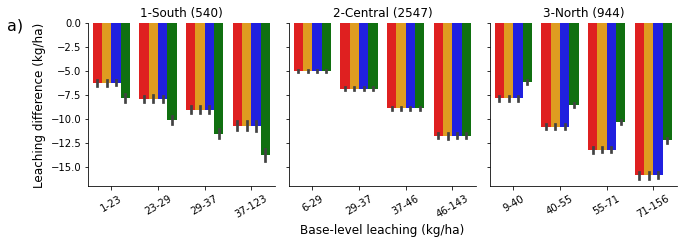

In [70]:
# BARCHART L change by base-level L 
perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region_lab', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "L_diff", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region_lab', 'L_0_bin'], as_index=False).agg(
    L_min=('L_0', 'min'), L_max=('L_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region_lab'], as_index=False).agg(
    fields_count=('L_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
     #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region_lab == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region_lab == region_n]['L_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title(region_n +' ('+ str(count_dt['fields_count'].values[i]) + ')')
    
graph.axes[0,0].set_ylabel("Leaching difference (kg/ha)", size = 12)
graph.axes[0,1].set_xlabel('Base-level leaching (kg/ha)', size = 12) 

plt.gcf().text(-0.05, 0.85, 'a)', fontsize=16)

# plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

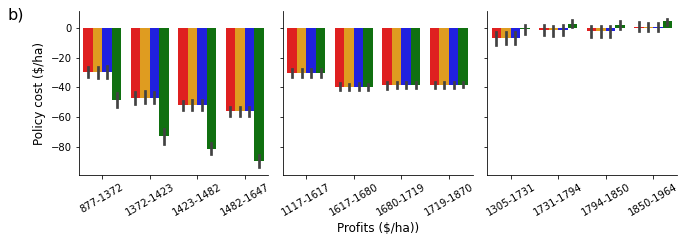

In [80]:
# BARCHART policy_cost by base-level P

perfomances_opt_df2['P_0_bin'] = perfomances_opt_df2.groupby(['region'])['P_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region_lab', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "P_0_bin", y = "policy_cost", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region_lab', 'P_0_bin'], as_index=False).agg(
    P_min=('P_0', 'min'), P_max=('P_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region_lab'], as_index=False).agg(
    fields_count=('P_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
    #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region_lab == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region_lab == region_n]['P_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title('')
    
graph.axes[0,0].set_ylabel("Policy cost ($/ha)", size = 12)
graph.axes[0,1].set_xlabel('Profits ($/ha))', size = 12)  

plt.gcf().text(-0.05, 0.85, 'b)', fontsize=16)
# plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

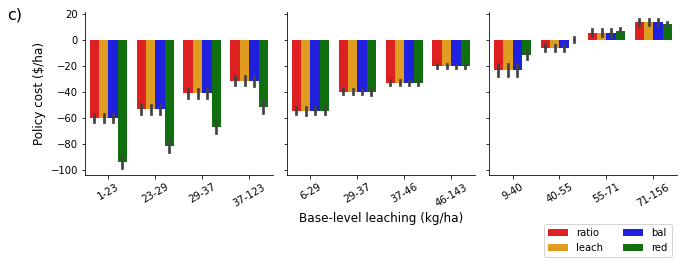

In [81]:
# BARCHART policy_cost by base-level L 
perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region_lab', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "policy_cost", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region_lab', 'L_0_bin'], as_index=False).agg(
    L_min=('L_0', 'min'), L_max=('L_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region_lab'], as_index=False).agg(
    fields_count=('L_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
     #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region_lab == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region_lab == region_n]['L_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title('')
    
graph.axes[0,0].set_ylabel("Policy cost ($/ha)", size = 12)
graph.axes[0,1].set_xlabel('Base-level leaching (kg/ha)', size = 12) 

plt.gcf().text(-0.05, 0.85, 'c)', fontsize=16)

plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')
   

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')


In [53]:
x_labels_tmp

array([1731, 1794, 1850, 1964])

In [ ]:
x_labels

In [ ]:
 
    
    
    
# iterate over axes of FacetGrid
for ax in graph.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [ ]:
hist = perfomances_opt_df2['L_0'].hist(bins=10)
# perfomances_opt_df2[['region', 'L_0']].groupby('region').quantile([0, .25, .5, 0.75, 1])

perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

bar_dt = perfomances_opt_df2.groupby(['policy_name', 'NMS', 'region', 'L_0_bin'], 
                                                                     as_index=False).agg(
    L_diff_mean=('L_diff', 'mean'),
    L_diff_std=('L_diff', 'std'),
    L_diff_count=('L_diff', 'count')).reset_index()


#bar_dt = bar_dt[bar_dt.region == '1']

bar_dt

In [ ]:
sns.barplot(data = bar_dt, x = "L_0_bin", y = "L_diff_mean", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

In [ ]:
graph = sns.FacetGrid(bar_dt, col ='region')

# map the above form facetgrid with some attributes 

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "L_diff_mean", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

In [ ]:
# BARCHART L change by base-level L 
cut_bins = [0, 25, 50, 70, 160]
perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'static'].groupby(['policy_name', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()

In [ ]:
perfomances_opt_df2['L_0'].quantile([.1, .5])
perfomances_opt_df2.groupby('key').quantile()

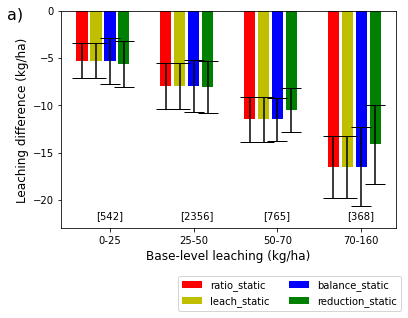

In [19]:
# BARCHART L change by base-level L 
cut_bins = [0, 25, 50, 70, 160]
perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'static'].groupby(['policy_name', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['L_diff']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['L_diff']['mean'],color = 'r',label = 'ratio_static',
      yerr=bar_ratio_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['L_diff']['mean'],color = 'y',label = 'leach_static',
      yerr=bar_leach_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['L_diff']['mean'],color = 'b',label = 'balance_static',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['L_diff']['mean'],color = 'g',label = 'reduction_static',
      yerr = bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)
# yerr = [tuple(bar_nred_dt['L_diff']['std'].values), (0,0,0,0)]
#ax.errorbar(pos4, bar_nred_dt['L_diff']['mean'], yerr=[tuple(bar_nred_dt['L_diff']['std'].values), (0,0,0,0)], fmt='-o')

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
   
for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.L_diff['count'][counter])+']', xy=(value, -22), xycoords='data', textcoords='data')      
ax.set_ylim(bottom= -23)   

plt.gcf().text(0, 0.85, 'a)', fontsize=16)
plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plt.legend(ncol=2, bbox_to_anchor=(1.03, -0.3), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

In [ ]:
pos3

In [ ]:
hist = perfomances_opt_df2['P_0'].hist(bins=5)

In [ ]:
perfomances_opt_df2

In [ ]:
# BARCHART P_diff change by base-level L

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [1200, 1500, 1650,1750, 2000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'static'].groupby(['policy_name', 'NMS', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'policy_cost':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['policy_cost']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['policy_cost']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['policy_cost']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['policy_cost']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['policy_cost']['mean'],color = 'g', label = 'reduction_static',
      yerr=bar_nred_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.policy_cost['count'][counter])+']', xy=(value, -103), xycoords='data', textcoords='data')    
ax.set_ylim(bottom= -108)   
    
# plt.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Policy cost ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.pdf"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# BARCHART P_diff by base-level L 

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [0, 25, 50, 70, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'static'].groupby(['policy_name', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt
bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal') ]
# bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['P_diff']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['P_diff']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['P_diff']['mean'],color = 'g', label = 'reduction_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()

for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.P_diff['count'][counter])+']', xy=(value,35), xycoords='data', textcoords='data')   
ax.set_ylim(top=80)

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)
# plt.legend(ncol=2)
# plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
# plt.savefig(plot_file_name, dpi=300)

# plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
# plt.savefig(plot_file_name, dpi=300)

In [ ]:
# BARCHART P_diff change by base-level L

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [1200, 1500, 1650,1750, 2000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'dynamic'].groupby(['policy_name', 'NMS', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'c', label = 'nopolicy_static',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_leach_dt['P_diff']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_bal_dt['P_diff']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos5, height = bar_nred_dt['P_diff']['mean'],color = 'g', label = 'reduction_dynamic',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
for counter, value in enumerate(pos2):    
    ax.annotate(count_dt.P_diff['count'][counter], xy=(value, 2), xycoords='data', textcoords='data')    

    
# plt.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# ratio_1_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
# leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NMS'] == '1')]
# nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
# subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_opt_df2['NMS'] == 'dynamic')]
leach_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'leach') & (perfomances_opt_df2['NMS'] == 'dynamic')]
nred_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'red') & (perfomances_opt_df2['NMS'] == 'dynamic')]
bal_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'bal') & (perfomances_opt_df2['NMS'] == 'dynamic')]
nopolicy_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nopolicy') & (perfomances_opt_df2['NMS'] == 'dynamic')]

In [ ]:
# Profits change by base-level P
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['P_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['P_0'], leach_2_dt['P_diff'], color = 'g', label = 'leach', s = 10)
ax.scatter(nred_2_dt['P_0'], nred_2_dt['P_diff'], color = 'b', label = 'reduction', s = 10)
ax.scatter(nopolicy_2_dt['P_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_dynamic')

plt.legend()

plt.xlabel("Base-level Profits (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
leach_2_dt

In [ ]:
# Profits change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['L_0'], leach_2_dt['P_diff'], color = 'g', label = 'dynamic-leach', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['P_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'nopolicy_dynamic', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_a.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# L change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['L_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['L_0'], leach_2_dt['L_diff'], color = 'g', label = 'dynamic-leach', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['L_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['L_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_b.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
perfomances_opt_df2

In [ ]:
import seaborn as sns

sns.distplot(nopolicy_2_dt['P_diff'], hist = False, kde = True,color = 'y', kde_kws = {'linewidth': 3}, label = 'nopolicy_dynamic')
sns.distplot(ratio_2_dt['P_diff'], hist = False, kde = True,color = 'r', kde_kws = {'linewidth': 3}, label = 'dynamic-ratio')
sns.distplot(leach_2_dt['P_diff'], hist = False, kde = True,color = 'g', kde_kws = {'linewidth': 3}, label = 'dynamic-leach')
sns.distplot(bal_2_dt['P_diff'], hist = False, kde = True,color = 'c', kde_kws = {'linewidth': 3}, label = 'dynamic-bal')
sns.distplot(nred_2_dt['P_diff'], hist = False, kde = True,color = 'b', kde_kws = {'linewidth': 3}, label = 'dynamic-reduction')

# Plot formatting
plt.legend(prop={'size': 16})
# plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Profits difference ($/ha)')
plt.ylabel('Density')

In [ ]:
perfomances_opt_df[perfomances_opt_df.NMS == '1']

In [ ]:
ratio_2_dt = perfomances_dt2[(perfomances_dt2.policy == 'ratio_11') & (perfomances_dt2.NMS == '2')]

ratio_2_dt

In [ ]:
pd.melt(ratio_2_dt, id_vars=['policy', 'id_10', 'id_field', 'z','NMS'], value_vars=['Y_corn', 'Y_soy', , 'L1' ,'L2',
                                                                                    'N_fert', 'P', 'G'])